In [29]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)
library(odbc)
library(Hmisc)
library(corrplot)
library(MESS)
library(ggExtra)
library(naniar)
library(mvoutlier)
library(MissMech)
library(mice)
library(MatchIt)
library(pastecs)
library(gridExtra)
library(tibble)
library(RColorBrewer)

# Homework #4
 
1. Extraction protocol
2. EDA
3. Data cleansing
 
### Part 1 - Extraction protocol

### Part 2 - EDA
 
#### 2.1 - Descriptive statistics
 
Generate a table showing the minimum, maximum, median, IQR, mean and standard deviation for each variable.
Use the functions summary (in R), describe (in Python), or use the Table1 function from the mechkar package

In [4]:
load("C:/Users/meir/Documents/DataScience/data/BoxOffice_ff_v.RData")

In [5]:
df<-movies_ff_v
y<-"revenue"

# 1. Descriptive statistics of the data 

In [9]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################
exploreData <- function(y=NULL, data=data, factorSize=10, dir="report", ...) {

  get_computer_type <- function(){
    # check if current R client is running on PC or on the server
    if (Sys.info()[1] == "Windows") {
      computer.type = "pc"
    } else if (Sys.info()[1] == "Linux") {
      computer.type = "server"
    }
    return(computer.type)
  }

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=T),sd=stats::sd(x,na.rm=T))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=T), "<br><u>Max date</u>:",max(x, na.rm=T) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    pl <- stats::scatter.smooth(df$x,col=df$cl)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(aes(x=data[[x]], y=data[[y]]), method="loess") + xlab(x) + ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(aes(y=data[[x]], color=data[[y]])) + xlab(x) + ylab(y) + labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(bp), collapse=', ' )
    }
    imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")
  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  if (get_computer_type()=="pc") {
    srcdir <- paste0(getwd(),"/",report)
  } else {
    srcdir <- paste0("file_show?path=",getwd(),"/",report)
  }
  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>

      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });

      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });

      $('#myform2').submit(function(e) {
      e.preventDefault();
      });

      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });

      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });

      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });

      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });

      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });

      </script>

      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      }
      .Row
      {
      display: table-row;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: 'arial';
      font-size: 14px;
      }
      </style>

      </head>

      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)

  for(x in names(data)) {
    print(x)
    html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b></div>")
    cat(html, file = myhtml, sep='\n', append=TRUE)
    #### initialize the first graph
    imgname = paste(fig,"/",x, "_1.png",sep="")
    imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
    ### send the data with the type to generate the correct graph..
    grDevices::png(imgname)
    drawGraphOne(x, data[[x]], data_types[x])
    grDevices::dev.off()
    html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
    cat(html, file = myhtml, sep='\n', append=TRUE)

    # second, show the statistics
    html <- getStats(data[[x]],data_types[x])
    cat(html, file = myhtml, sep='\n', append=TRUE)

    # third, determine the outliers
    imgname = paste(fig,"/",x, "_2.png",sep="")
    if(data_types[x]==1) {
      grDevices::png(imgname)
      getOutlierGraph(data[[x]])
      grDevices::dev.off()
      html <- getOutliersHtml(x,data[[x]],srcdir)
    } else {
      html <- "<div class='Cell'></div>"
    }
    cat(html, file = myhtml, sep='\n', append=TRUE)

    # fourth, if y is assigned, make a corresponding plot
    if(is.null(y)==FALSE) {
      imgname = paste(fig,"/",x, "_3.png",sep="")
      imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
      #print(imgname)
      grDevices::png(imgname)
      ### scatter.smooth(data[[x]] ~ data[[y]])
      #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
      plot(getScatterGraph(data,x,y,data_types[y]))
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)
    }
    html <- paste("</div>")
    cat(html, file = myhtml, sep='\n', append=TRUE)
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  if(.Platform$OS.type == "unix") {
    system(paste("start /b ", myhtml))
  } else {
    shell(paste("explorer ", gsub("/", "\\\\", myhtml) ), intern=TRUE)
  }
}

###################### END exploreData ###############

############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-12-19                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function (x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL) {
  ### define sub-functions
  options(warn=-1)
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    #print(factorVars)
    if(is.null(factorVars)==T) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    #print(factorVars)
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==F & (v %in% factorVars)) | (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == T & sum(is.na(data[[v]])==T) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==T)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == T | is.null(factorVars)==F ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==T & categorize==T &
                       ((is.null(factorVars)==F & (v %in% factorVars)) |
                          (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==T) {
            #print(paste("The variable",v,"has no data... avoided"))
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==T) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==T & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==F ) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==T) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      utils::setTxtProgressBar(pb,ii)
      ii <- ii + 1
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")
        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==T & categorize==T & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==T & categorize==T & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==T) {
              if (messages==T) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]))[1, 4]), 3)
                } else {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE)[1, 3]), 3)
                }
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if (min(table(data[[v]],data[[y]])) > 5) {
                pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
              } else {
                if(min(table(data[[v]],data[[y]]))==0) {
                  #in cases where there are cells with zero, we use Fisher's exact test
                  tryCatch(
                    pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                    error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                } else {
                  pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                }
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as.tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==F) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==T) {
            print("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          print("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- tabaaa1 %>%
            dplyr::filter(Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))

        tabaaa1 <- tabaaa1 %>% dplyr::filter(Pop != " -- ") #%>%
      }
    }
  }
  tabaaa1 <- tabaaa1 %>% dplyr::select(-n) %>% dplyr::select(-Del)
  ##### Join the tables...
  Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    wb <- xlsx::createWorkbook()
    sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    xlsx::saveWorkbook(wb, excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = F)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


In [ ]:
# Descriptive statistics by the function "stat.desc" from pastecs library. 
pastecs::stat.desc(df)

In [ ]:
# Descriptive statistics by the function "Table1" from mechker library. 
Table1(data = df)

In [ ]:
# Descriptive statistics by the function "summary".
summary(df)

# 2.2 - Visualization of the variables
 
For continuous variables plot two/three graphs: 
 
- one showing possible outliers (boxplot or scatterplot with index as x-axis)
- one showing the distribution (histogram)

Optionally, the exploreData function of the mechkar package could be used

In [ ]:
#The "loop" way in order to create the 3 graphs for each of the variable
options(repr.plot.width = 12, repr.plot.height = 4)
for(i in names(df)) {
    print(i)
    p1 <- ggplot(data=df) + geom_boxplot(aes(y=df[[i]]))
    p2 <- ggplot(data=df) + geom_point(aes(x=row.names(df),y=df[[i]]))
    p3 <- ggplot(data=df) + geom_density(aes(df[[i]]))
    grid.arrange(p1, p2,p3, nrow = 1)
}

In [ ]:
# Running the "mechkar" function in order to see the distribution graphs and the outliers
exploreData(data=df, y=y)

#  Spliting the data

In [14]:
#All the Continuous variables, including the y
zm1 <- c("revenue"
         ,"popularity"
         ,"runtime"
         ,"budget"
         ,"seasonality"
         ,"actor0_prev_revenue"
         ,"actor1_prev_revenue"
         ,"actor2_prev_revenue")

In [15]:
#All the categorial 0/1 variables with y
zm2 <- c("revenue"
         ,"sw_lang_en"
         ,"sw_web_presence"
         ,"sw_has_poster"
         ,"sw_tagline"
         ,"high_release_month"
         ,"lang_US"
         ,"lang_FR"
         ,"lang_RU"
         ,"lang_ES"
         ,"lang_JA"
        ,"genre_adventure"
        ,"genre_fantasy"
        ,"genre_animation"
        ,"genre_drama"
        ,"genre_horror"
        ,"genre_action"
        ,"genre_comedy"
        ,"genre_history"
        ,"genre_western"
        ,"genre_thriller"
        ,"genre_crime"
        ,"genre_documentary"
        ,"genre_science_fiction"
        ,"genre_mystery"
        ,"genre_music"
        ,"genre_romance"
        ,"genre_family"
        ,"genre_war"
        ,"genre_foreign")

In [16]:
zm3 <- c("revenue"
        ,"sw_female_actor0"
        ,"sw_female_actor1"
        ,"sw_female_actor2"
        ,"sw_male_actor0"
        ,"sw_male_actor1"
        ,"sw_male_actor2")

In [17]:
#All the numeric 0/1 variables with y
zm4 <- c("revenue"
        ,"keyword_cnt"
        ,"sw_collection"
        ,"producers_cnt"
        ,"countries_cnt"
        ,"actor0_movies_cnt"
        ,"actor0_movies_5y_cnt"
        ,"actor1_movies_cnt"
        ,"actor1_movies_5y_cnt"
        ,"actor2_movies_cnt"
        ,"actor2_movies_5y_cnt"
        ,"director_movies_cnt"
        ,"director_movies_5y_cnt"
        ,"depart_Art"
        ,"depart_Camera"
        ,"depart_Crew"
        ,"depart_Custom_Mkup"
        ,"depart_Directing"
        ,"depart_Editing"
        ,"depart_Lighting"
        ,"depart_Production"
        ,"depart_Sound"
        ,"depart_Visual_Effects"
        ,"depart_Writing"
        ,"depart_Art_female"
        ,"depart_Camera_female"
        ,"depart_Crew_female"
        ,"depart_Custom_Mkup_female"
        ,"depart_Directing_female"
        ,"depart_Editing_female"
        ,"depart_Lighting_female"
        ,"depart_Production_female"
        ,"depart_Sound_female"
        ,"depart_Visual_Effects_female"
        ,"depart_Writing_female")

In [21]:
#All the time variables with y
zm5 <- c("revenue"
         ,"release_day"
         ,"release_month"
         ,"release_year"
         )

In [19]:
#All the categorial non-numeric variables (factors) with y
zm6 <- c("revenue"
         ,"original_language"
         ,"runtime_cat")

# 2.3 - Correlation matrix
 
Create a correlation matrix and present it as a graph...
There are many ways to do this:
 
- Creating the correlations manually with a loop
- Calling packages that make this automatically
 

In [52]:
#The "loop way" in order to create the correlation matrix
res <- NULL
nm <- names(movies_ff_v[,zm5])
for(i in nm) {
    rw <- NULL
    for(j in nm) {
        rw <- cbind(rw,cor.test(x=(movies_ff_v[,zm5])[[i]],y=(movies_ff_v[,zm5])[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- nm
colnames(res) <- nm
res

revenue    release_day   release_month release_year
revenue       1.00000000  0.0606503918  0.0364920303  0.017917598
release_day   0.06065039  1.0000000000 -0.0009423409  0.006177444
release_month 0.03649203 -0.0009423409  1.0000000000 -0.049765136
release_year  0.01791760  0.0061774439 -0.0497651356  1.000000000

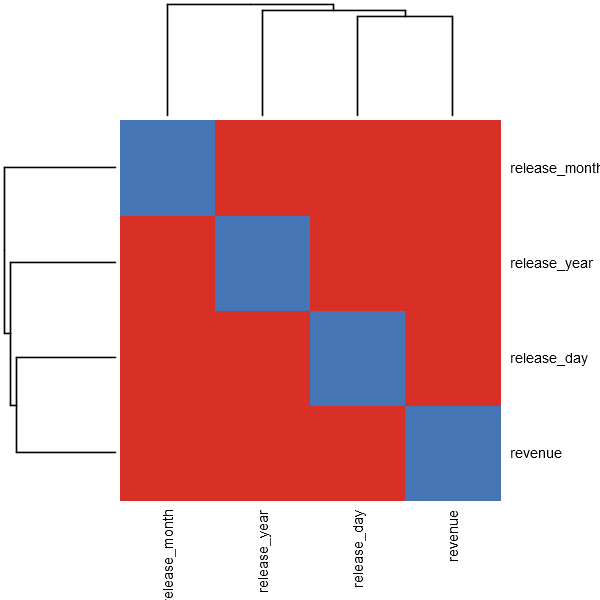

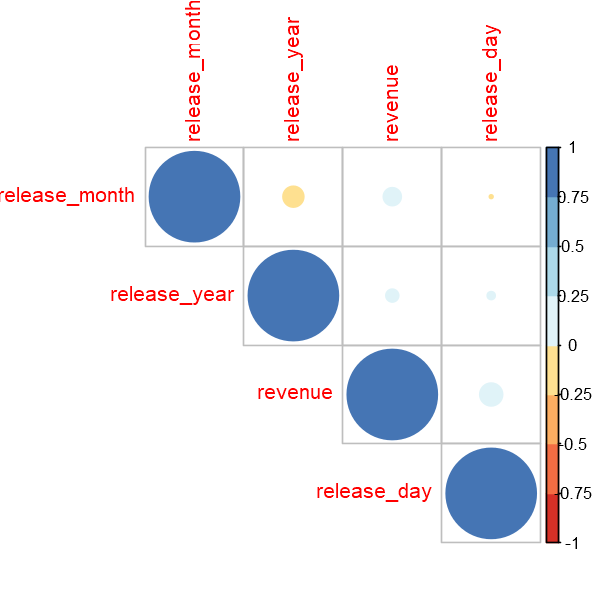

In [57]:
options(repr.plot.width = 5, repr.plot.height = 5)
heatmap<-heatmap(res,symm = T,cexCol = 0.8, cexRow = 0.8, col=brewer.pal(n=8, name="RdYlBu"))
corrplot<-corrplot(res, type="upper", order="hclust", col=brewer.pal(n=8, name="RdYlBu"))

In [42]:
res1 <-  rcorr(as.matrix(movies_ff_v[,zm1]),type="spearman")

In [77]:
res2 <-  rcorr(as.matrix(movies_ff_v[,zm2]),type="spearman")

In [76]:
res3 <-  rcorr(as.matrix(movies_ff_v[,zm3]),type="spearman")

In [75]:
res4 <-  rcorr(as.matrix(movies_ff_v[,zm4]),type="spearman")

In [22]:
res5 <-  rcorr(as.matrix(movies_ff_v[,zm5]),type="spearman")

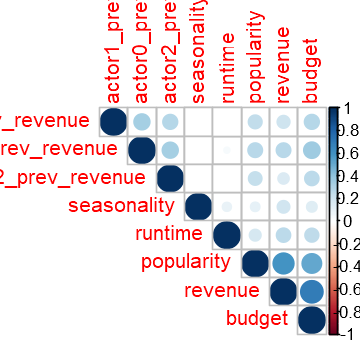

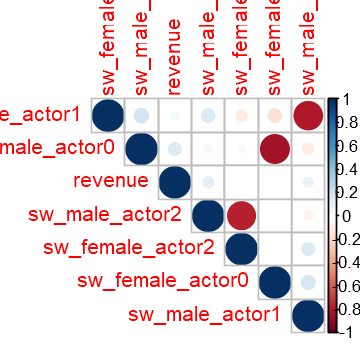

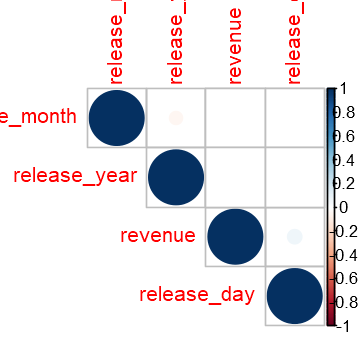

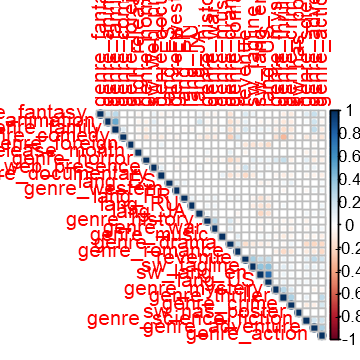

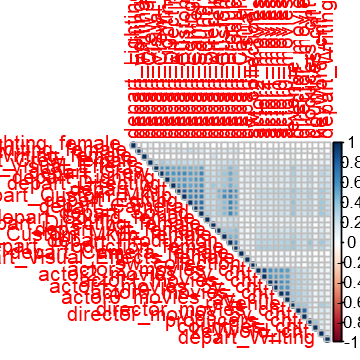

In [72]:
options(repr.plot.width = 3, repr.plot.height = 3)
corrplot(res1$r, type="upper", order="hclust", 
         p.mat = res1$P, sig.level = 0.01, insig = "blank", col=brewer.pal(n=8, name="RdYlBu"))
corrplot(res3$r, type="upper", order="hclust", 
         p.mat = res3$P, sig.level = 0.01, insig = "blank", col=brewer.pal(n=8, name="RdYlBu"))
corrplot(res5$r, type="upper", order="hclust", 
         p.mat = res5$P, sig.level = 0.01, insig = "blank", col=brewer.pal(n=8, name="RdYlBu"))
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank", col=brewer.pal(n=8, name="RdYlBu"))
corrplot(res4$r, type="upper", order="hclust", 
         p.mat = res4$P, sig.level = 0.01, insig = "blank", col=brewer.pal(n=8, name="RdYlBu"))

# 2.4 - Describe the outcome variable

- Histogram
- Histogram by categories

#   "revenue"
The "Revenue" is not normally distributed 
In the histogram we can see that most of the data are located in the "small" scale and little in the "big".. 
In addition, the Mean(=6.688e+07) and the Median(=1.693e+07) are very different.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
1.000e+00 2.405e+06 1.693e+07 6.688e+07 6.906e+07 1.520e+09      4382 

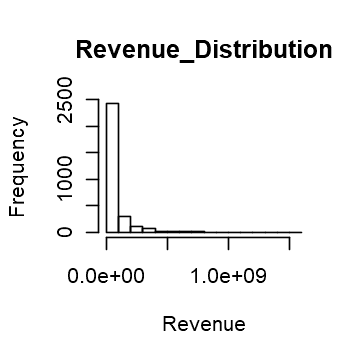

In [13]:
options(repr.plot.width = 3, repr.plot.height = 3)
summary(movies_ff_v$revenue)
hist(movies_ff_v$revenue
     ,main="Revenue_Distribution"
     ,xlab="Revenue"
     ,ylab="Frequency")

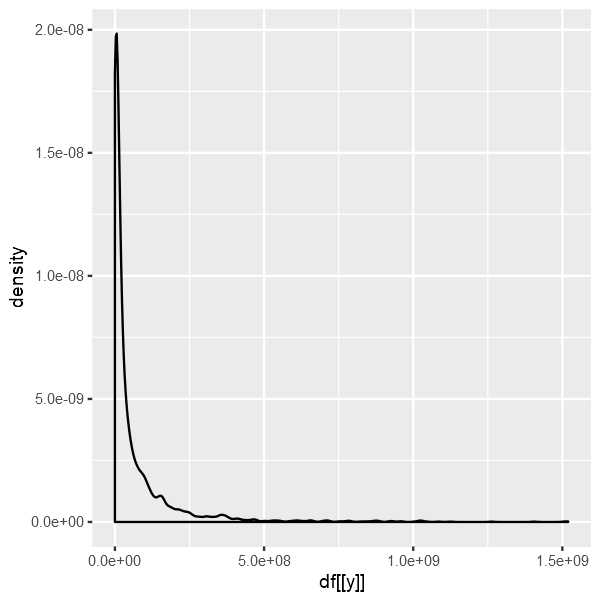

In [58]:
#By ggplot
ggplot(data=df) + geom_density(aes(df[[y]]))

# Tring to find any categorial variables that change revenue's distribition:
From the hist of revenue against the categorials vars we can see that there are 2 vars that change Revenue's distribition:
1."genre_thriller"
2."genre_foreign"

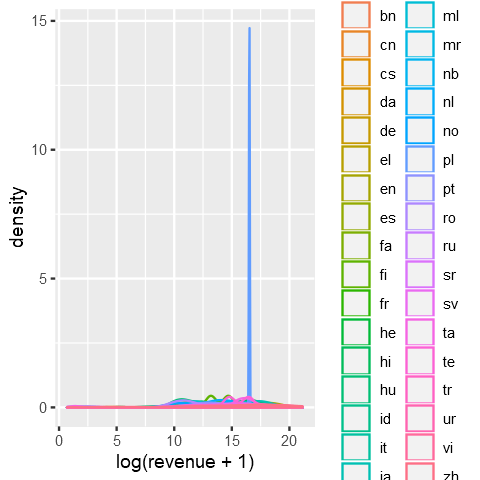

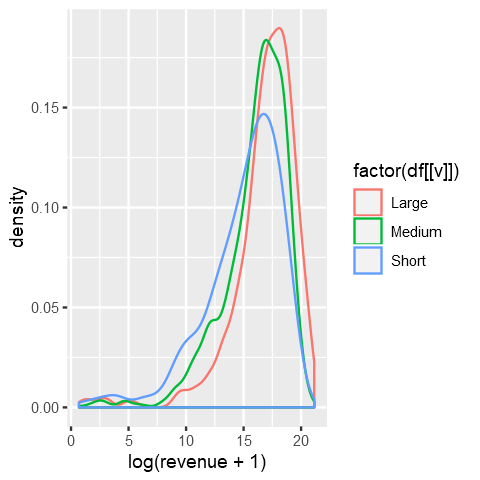

In [60]:
# Ploting revenue distribution against the non-numeric variables: "original_language","runtime_cat"
options(repr.plot.width = 4, repr.plot.height = 4)
nm <-c("original_language","runtime_cat")
for (v in nm){
g1 <- ggplot(data=df) +
   geom_density(aes(log(revenue+1), col=factor(df[[v]]),group=factor(df[[v]])))
    plot(g1)
}
#Couldn't find any changes in revenue's distribution

#for only one var we use:
#ggplot(data=df) + geom_density(aes(df[[y]], group=factor(df[["var"]]), color=factor(df[["var"]])))

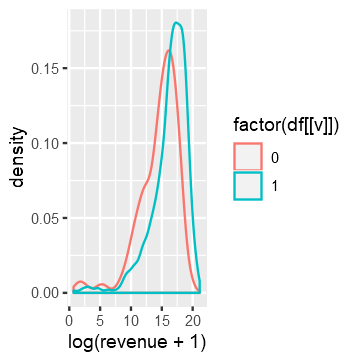

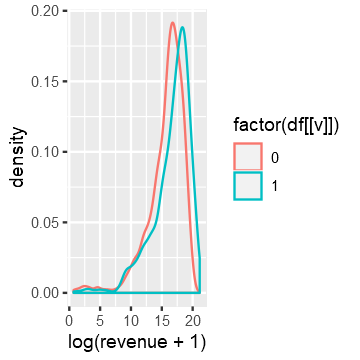

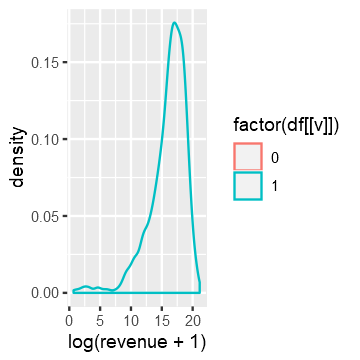

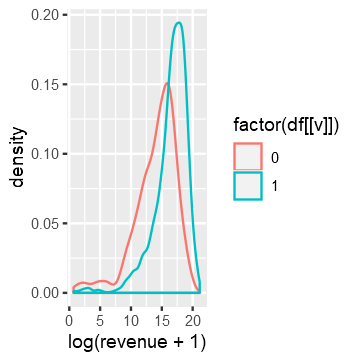

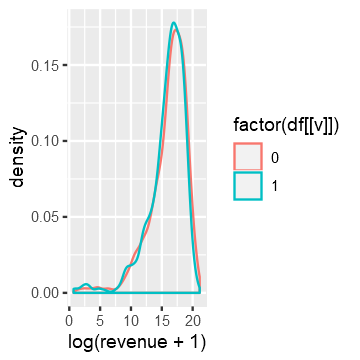

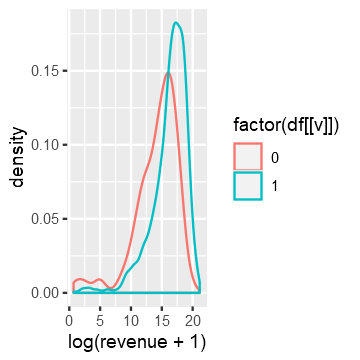

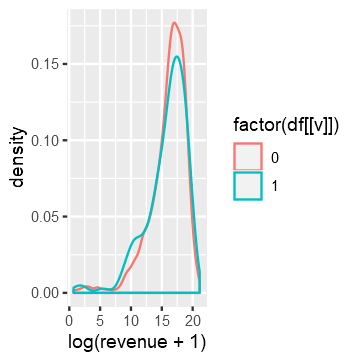

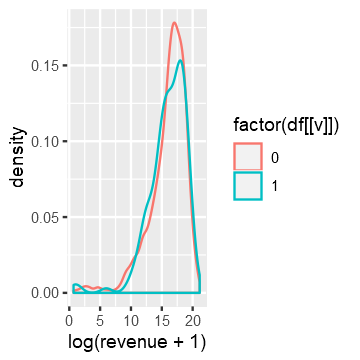

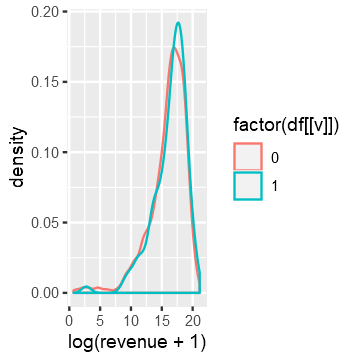

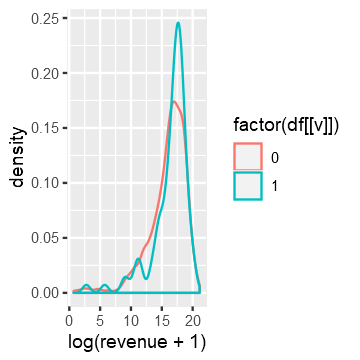

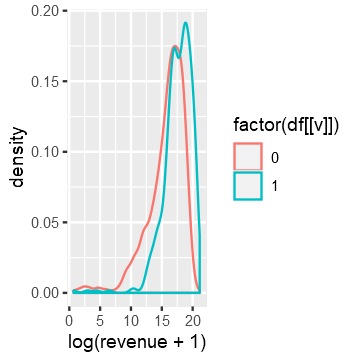

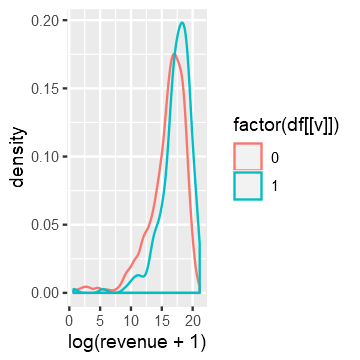

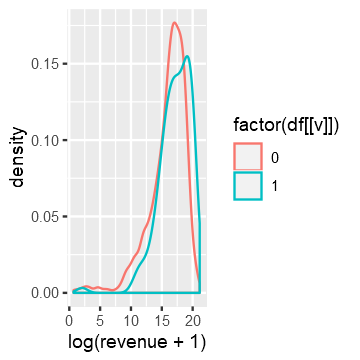

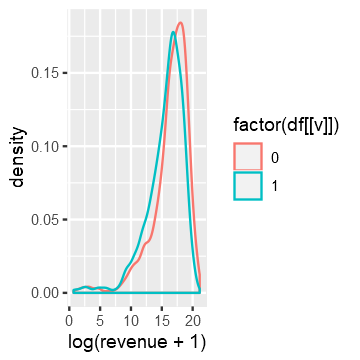

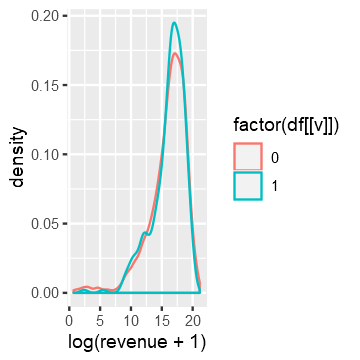

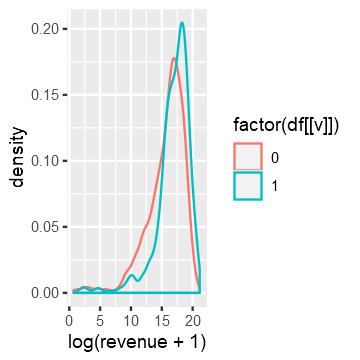

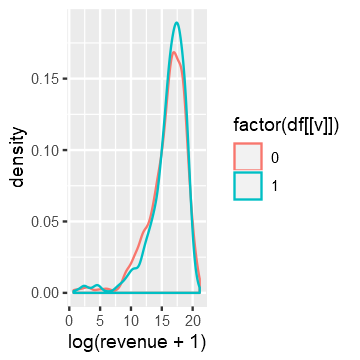

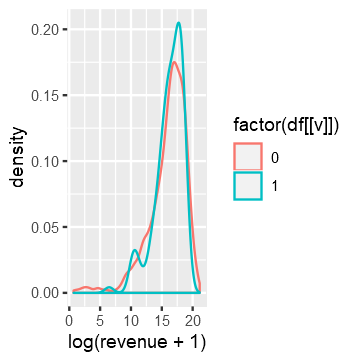

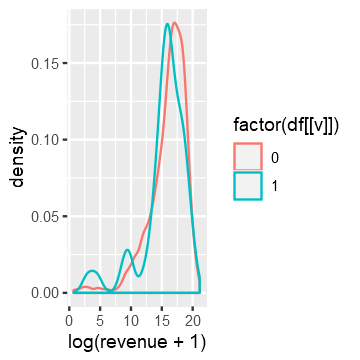

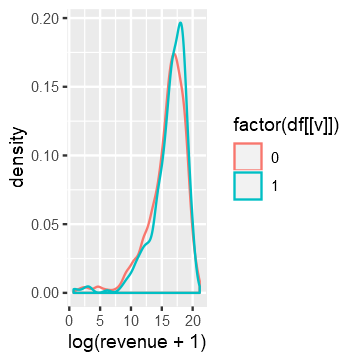

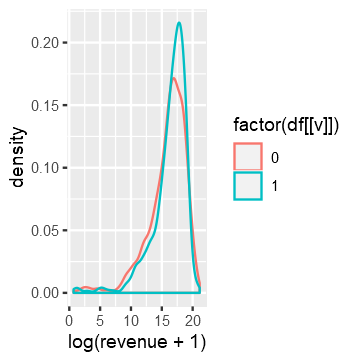

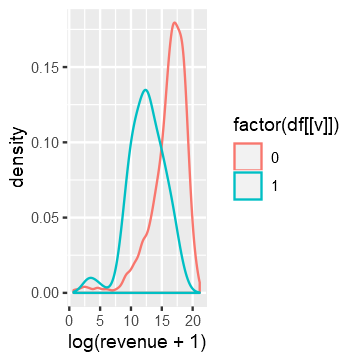

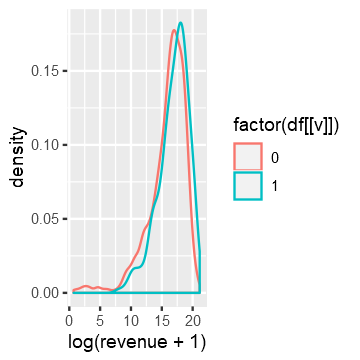

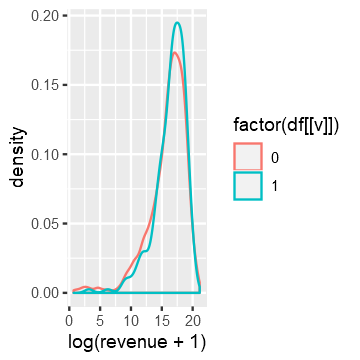

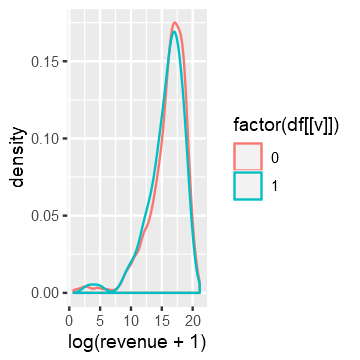

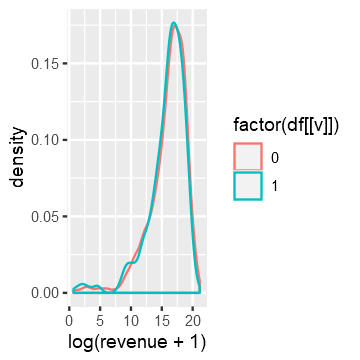

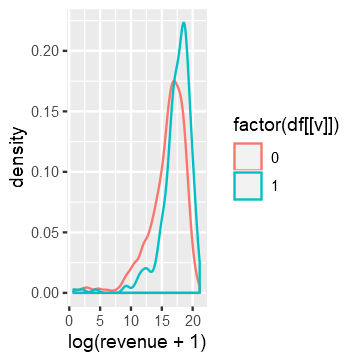

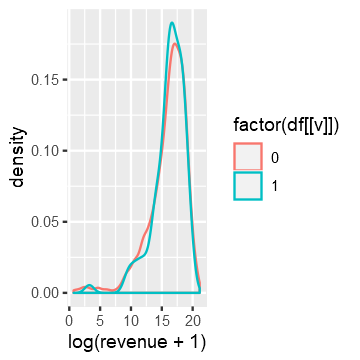

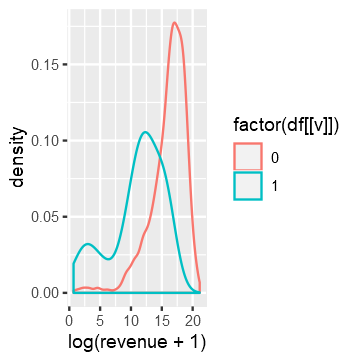

In [61]:
# Ploting revenue distribution against all the categorial variables 0/1
options(repr.plot.width = 3, repr.plot.height = 3)
nm1 <- c("sw_lang_en"
         ,"sw_web_presence"
         ,"sw_has_poster"
         ,"sw_tagline"
         ,"high_release_month"
         ,"lang_US"
         ,"lang_FR"
         ,"lang_RU"
         ,"lang_ES"
         ,"lang_JA"
        ,"genre_adventure"
        ,"genre_fantasy"
        ,"genre_animation"
        ,"genre_drama"
        ,"genre_horror"
        ,"genre_action"
        ,"genre_comedy"
        ,"genre_history"
        ,"genre_western"
        ,"genre_thriller"
        ,"genre_crime"
        ,"genre_documentary"
        ,"genre_science_fiction"
        ,"genre_mystery"
        ,"genre_music"
        ,"genre_romance"
        ,"genre_family"
        ,"genre_war"
        ,"genre_foreign")

for (v in nm1){
g2 <- ggplot(data=df) +
   geom_density(aes(log(revenue+1), col=factor(df[[v]]),group=factor(df[[v]])))
    plot(g2)
}
#From the hist of revenue against the categorials 0/1 vars we can see that there are 2 vars that change Revenue's distribition:
#1."genre_thriller"
#2."genre_foreign"

# 5. Outliers
The pairs function can give us a clue about the outliers in the the Continuous vars against revenue, in addition, in the "mechkar" we can see all about the outliers

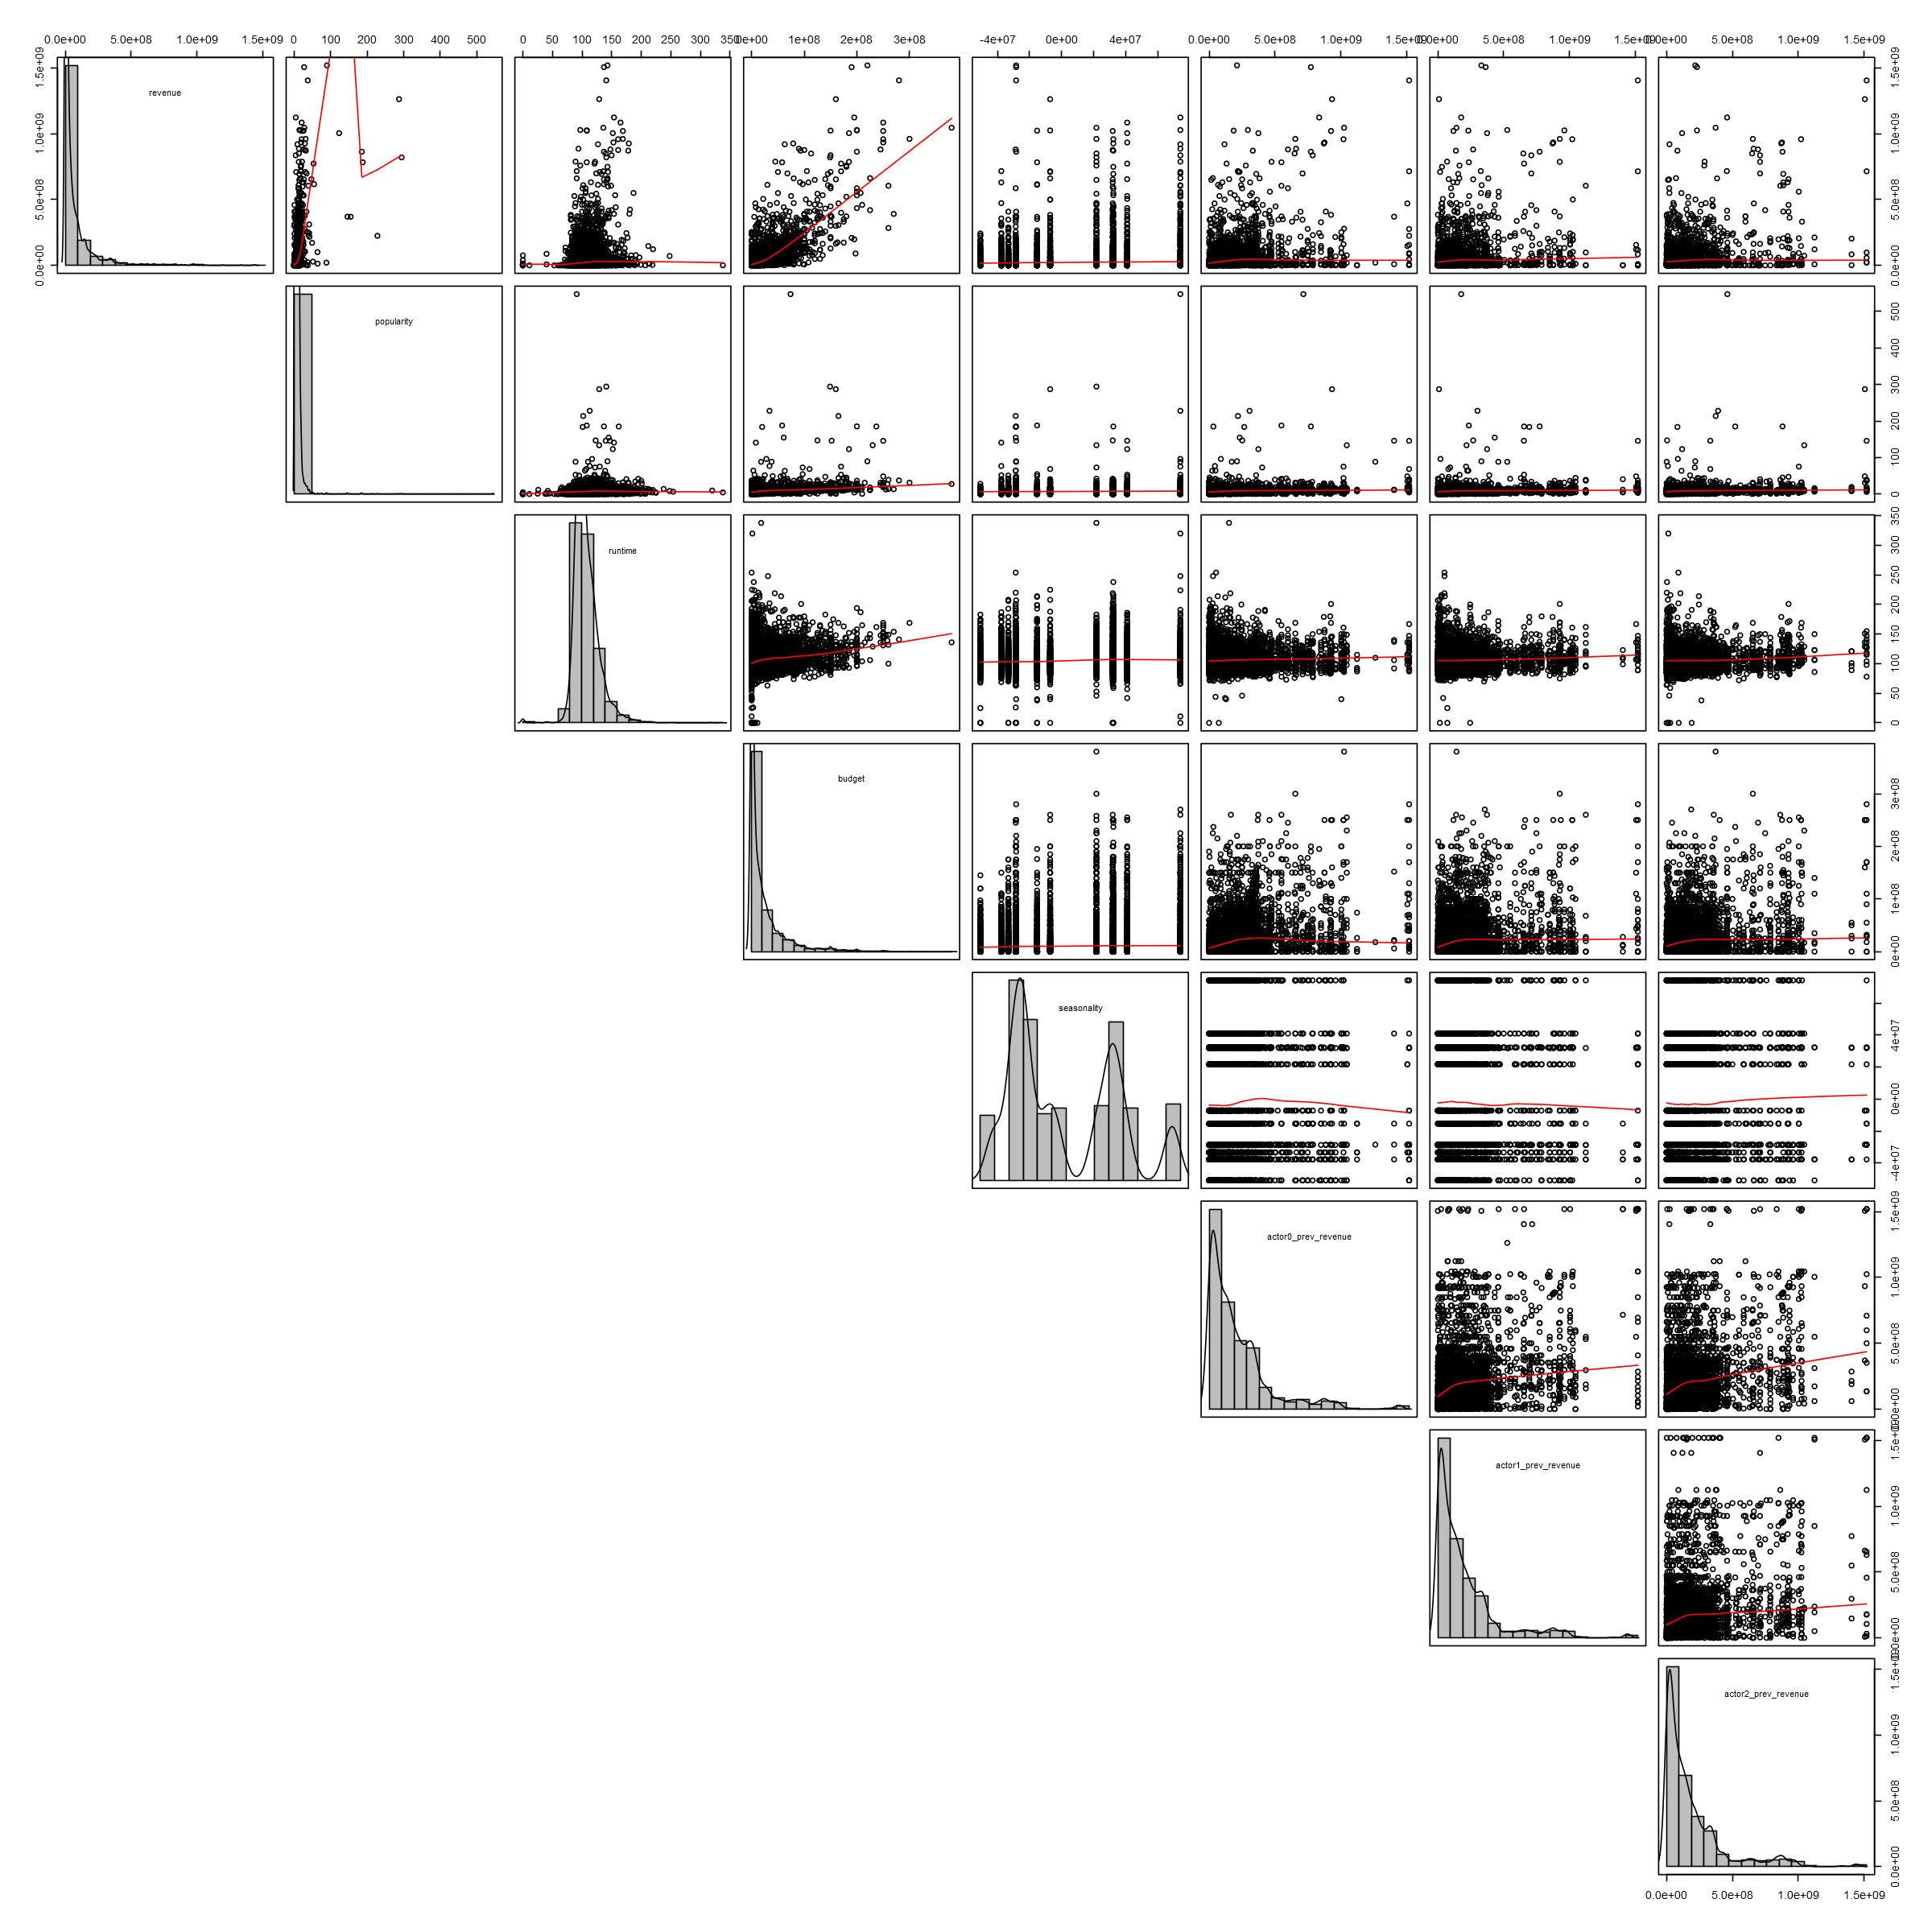

In [102]:
# Runing pairs function for the Continuous vars
options(repr.plot.width = 20, repr.plot.height = 20)
pairs((movies_ff_v[,zm1]), 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

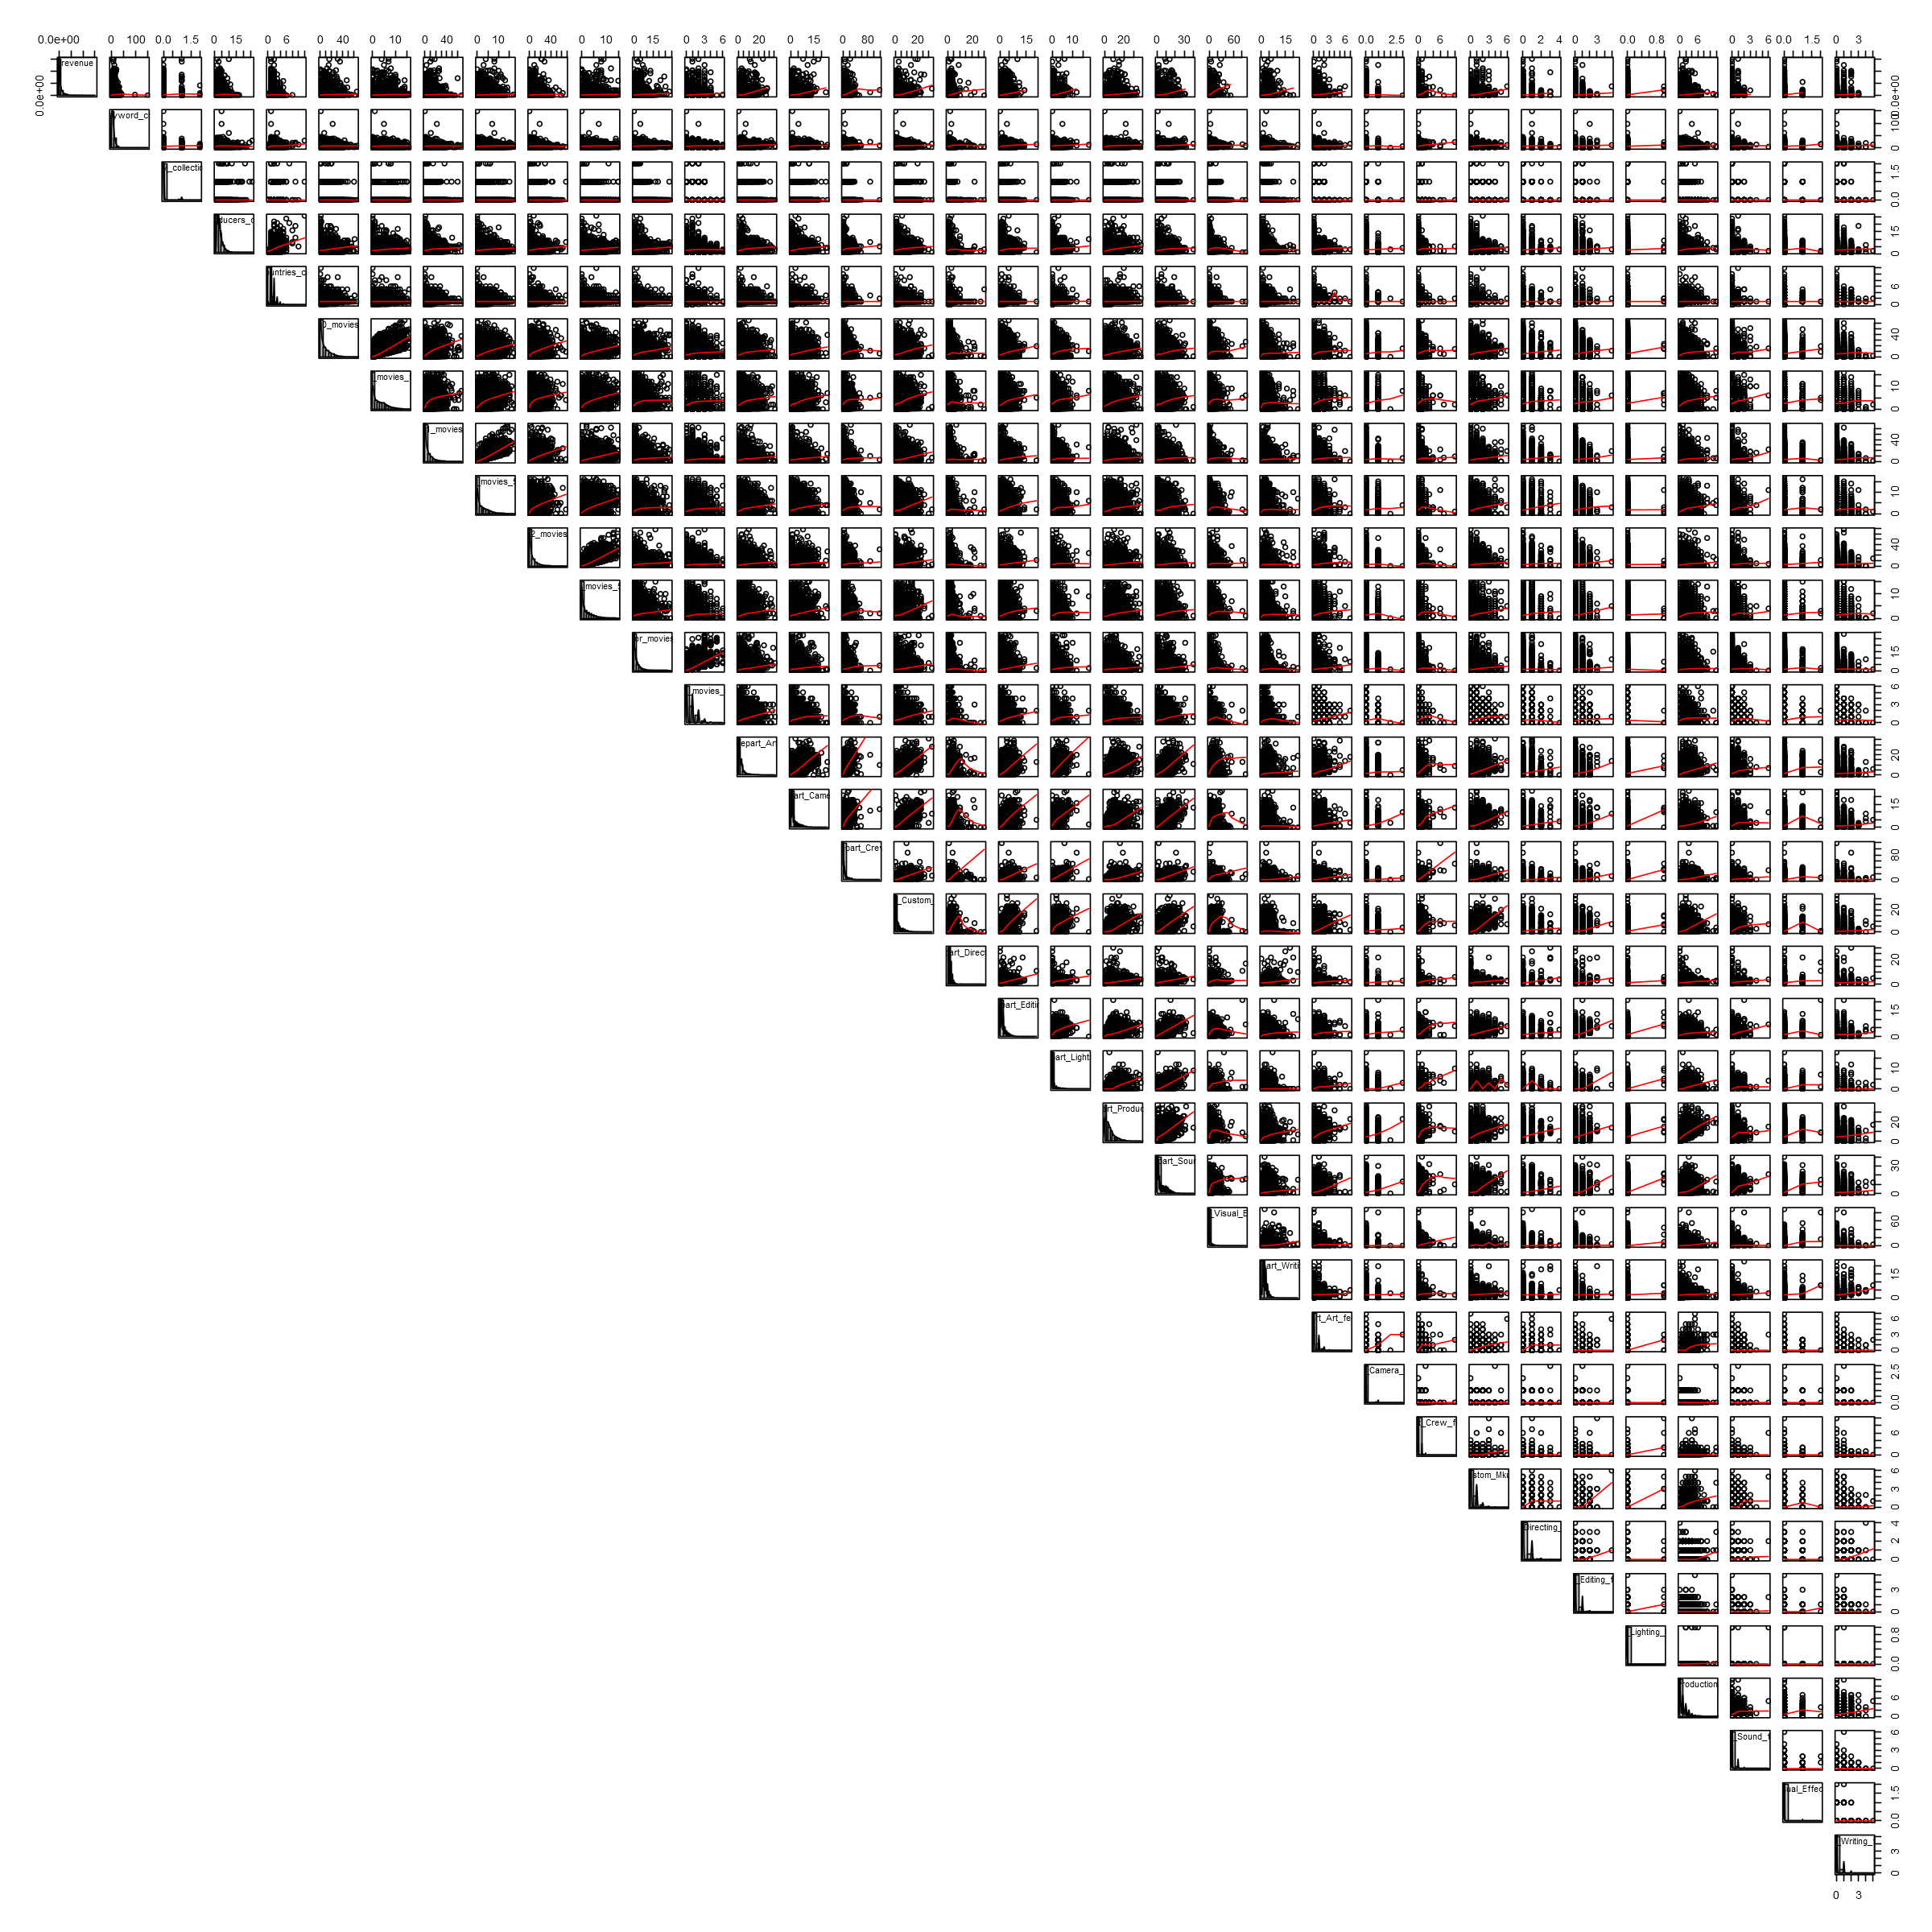

In [72]:
# Runing pairs function for the other numeric vars
options(repr.plot.width = 20, repr.plot.height = 20)
pairs((movies_ff_v[,zm4]), 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

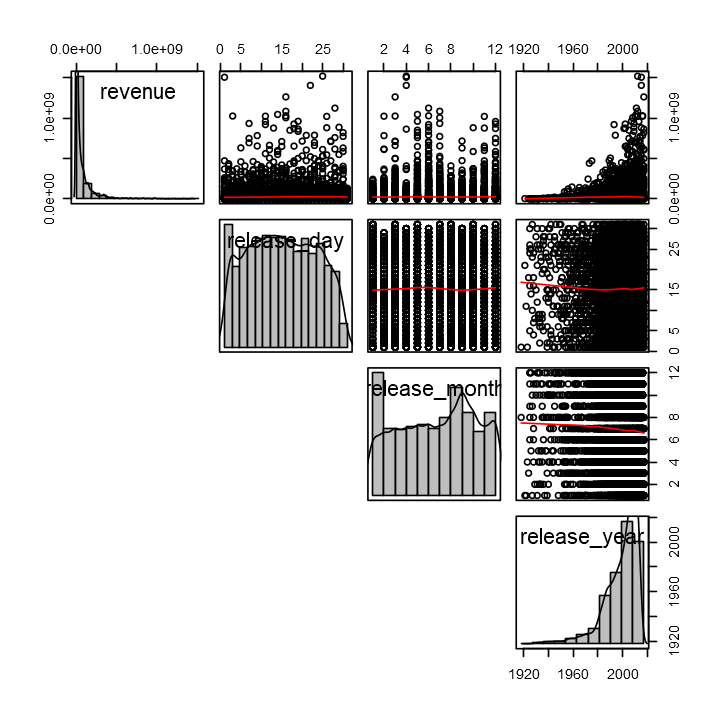

In [71]:
# Runing pairs function for the time vars
options(repr.plot.width = 6, repr.plot.height = 6)
pairs((movies_ff_v[,zm5]), 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

# 6. Finding the NULLs

In [4]:
#Finding the missing data using getMissingness function by Dr. Tomas Karpatit
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [65]:
getMissingness(movies_ff_v, getRows = FALSE)

[[1]]
                   var na.count rate
1              revenue     4382 59.4
2  actor2_prev_revenue     3423 46.4
3  actor1_prev_revenue     3201 43.4
4  actor0_prev_revenue     2752 37.3
5     sw_female_actor0      934 12.7
6       sw_male_actor0      934 12.7
7     sw_female_actor2      788 10.7
8       sw_male_actor2      788 10.7
9     sw_female_actor1      782 10.6
10      sw_male_actor1      782 10.6

[[2]]
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."



$missingness
                            var na.count rate
1                       revenue     4382 59.4
2           actor2_prev_revenue     3423 46.4
3           actor1_prev_revenue     3201 43.4
4           actor0_prev_revenue     2752 37.3
5              sw_female_actor0      934 12.7
6                sw_male_actor0      934 12.7
7              sw_female_actor2      788 10.7
8                sw_male_actor2      788 10.7
9              sw_female_actor1      782 10.6
10               sw_male_actor1      782 10.6
11                producers_cnt      395  5.4
12                   depart_Art       34  0.5
13                depart_Camera       34  0.5
14                  depart_Crew       34  0.5
15           depart_Custom_Mkup       34  0.5
16             depart_Directing       34  0.5
17               depart_Editing       34  0.5
18              depart_Lighting       34  0.5
19            depart_Production       34  0.5
20                 depart_Sound       34  0.5
21        depart_Visual_Effects       34  0.5
22               depart_Writing       34  0.5
23            depart_Art_female       34  0.5
24         depart_Camera_female       34  0.5
25           depart_Crew_female       34  0.5
26    depart_Custom_Mkup_female       34  0.5
27      depart_Directing_female       34  0.5
28        depart_Editing_female       34  0.5
29       depart_Lighting_female       34  0.5
30     depart_Production_female       34  0.5
31          depart_Sound_female       34  0.5
32 depart_Visual_Effects_female       34  0.5
33        depart_Writing_female       34  0.5
34                      runtime        5  0.1
35                 release_date        1  0.0
36                 release_year        1  0.0
37                release_month        1  0.0
38                  release_day        1  0.0
39                  seasonality        1  0.0

$message
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."

$rows
NULL

# 7. Missing matrix

In [6]:
#The missingMatrix function by Dr. Tomas Karpatit
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}

minmax <- function(x) {  #minmax if we have data of 1000 number we chnage it into 1 and 0 but keep the distribiution it change the borders and the alogritm works better
    return(((x-min(x,na.rm=T))/(max(x,na.rm=T)-min(x,na.rm=T))))
}


In [91]:
#The missing matrix
movies_missing <- missingMatrix(movies_ff_v)
head(movies_missing)

movie_id budget original_language popularity release_date runtime runtime_cat
1 0        0      0                 0          0            0       0          
2 0        0      0                 0          0            0       0          
3 0        0      0                 0          0            0       0          
4 0        0      0                 0          0            0       0          
5 0        0      0                 0          0            0       0          
6 0        0      0                 0          0            0       0          
  revenue sw_lang_en sw_web_presence ... depart_Crew_female
1 0       0          0               ... 0                 
2 0       0          0               ... 0                 
3 0       0          0               ... 0                 
4 0       0          0               ... 0                 
5 0       0          0               ... 0                 
6 0       0          0               ... 0                 
  depart_Custom_Mkup_female depart_Directing_female depart_Editing_female
1 0                         0                       0                    
2 0                         0                       0                    
3 0                         0                       0                    
4 0                         0                       0                    
5 0                         0                       0                    
6 0                         0                       0                    
  depart_Lighting_female depart_Production_female depart_Sound_female
1 0                      0                        0                  
2 0                      0                        0                  
3 0                      0                        0                  
4 0                      0                        0                  
5 0                      0                        0                  
6 0                      0                        0                  
  depart_Visual_Effects_female depart_Writing_female observation
1 0                            0                     0          
2 0                            0                     0          
3 0                            0                     0          
4 0                            0                     0          
5 0                            0                     0          
6 0                            0                     0

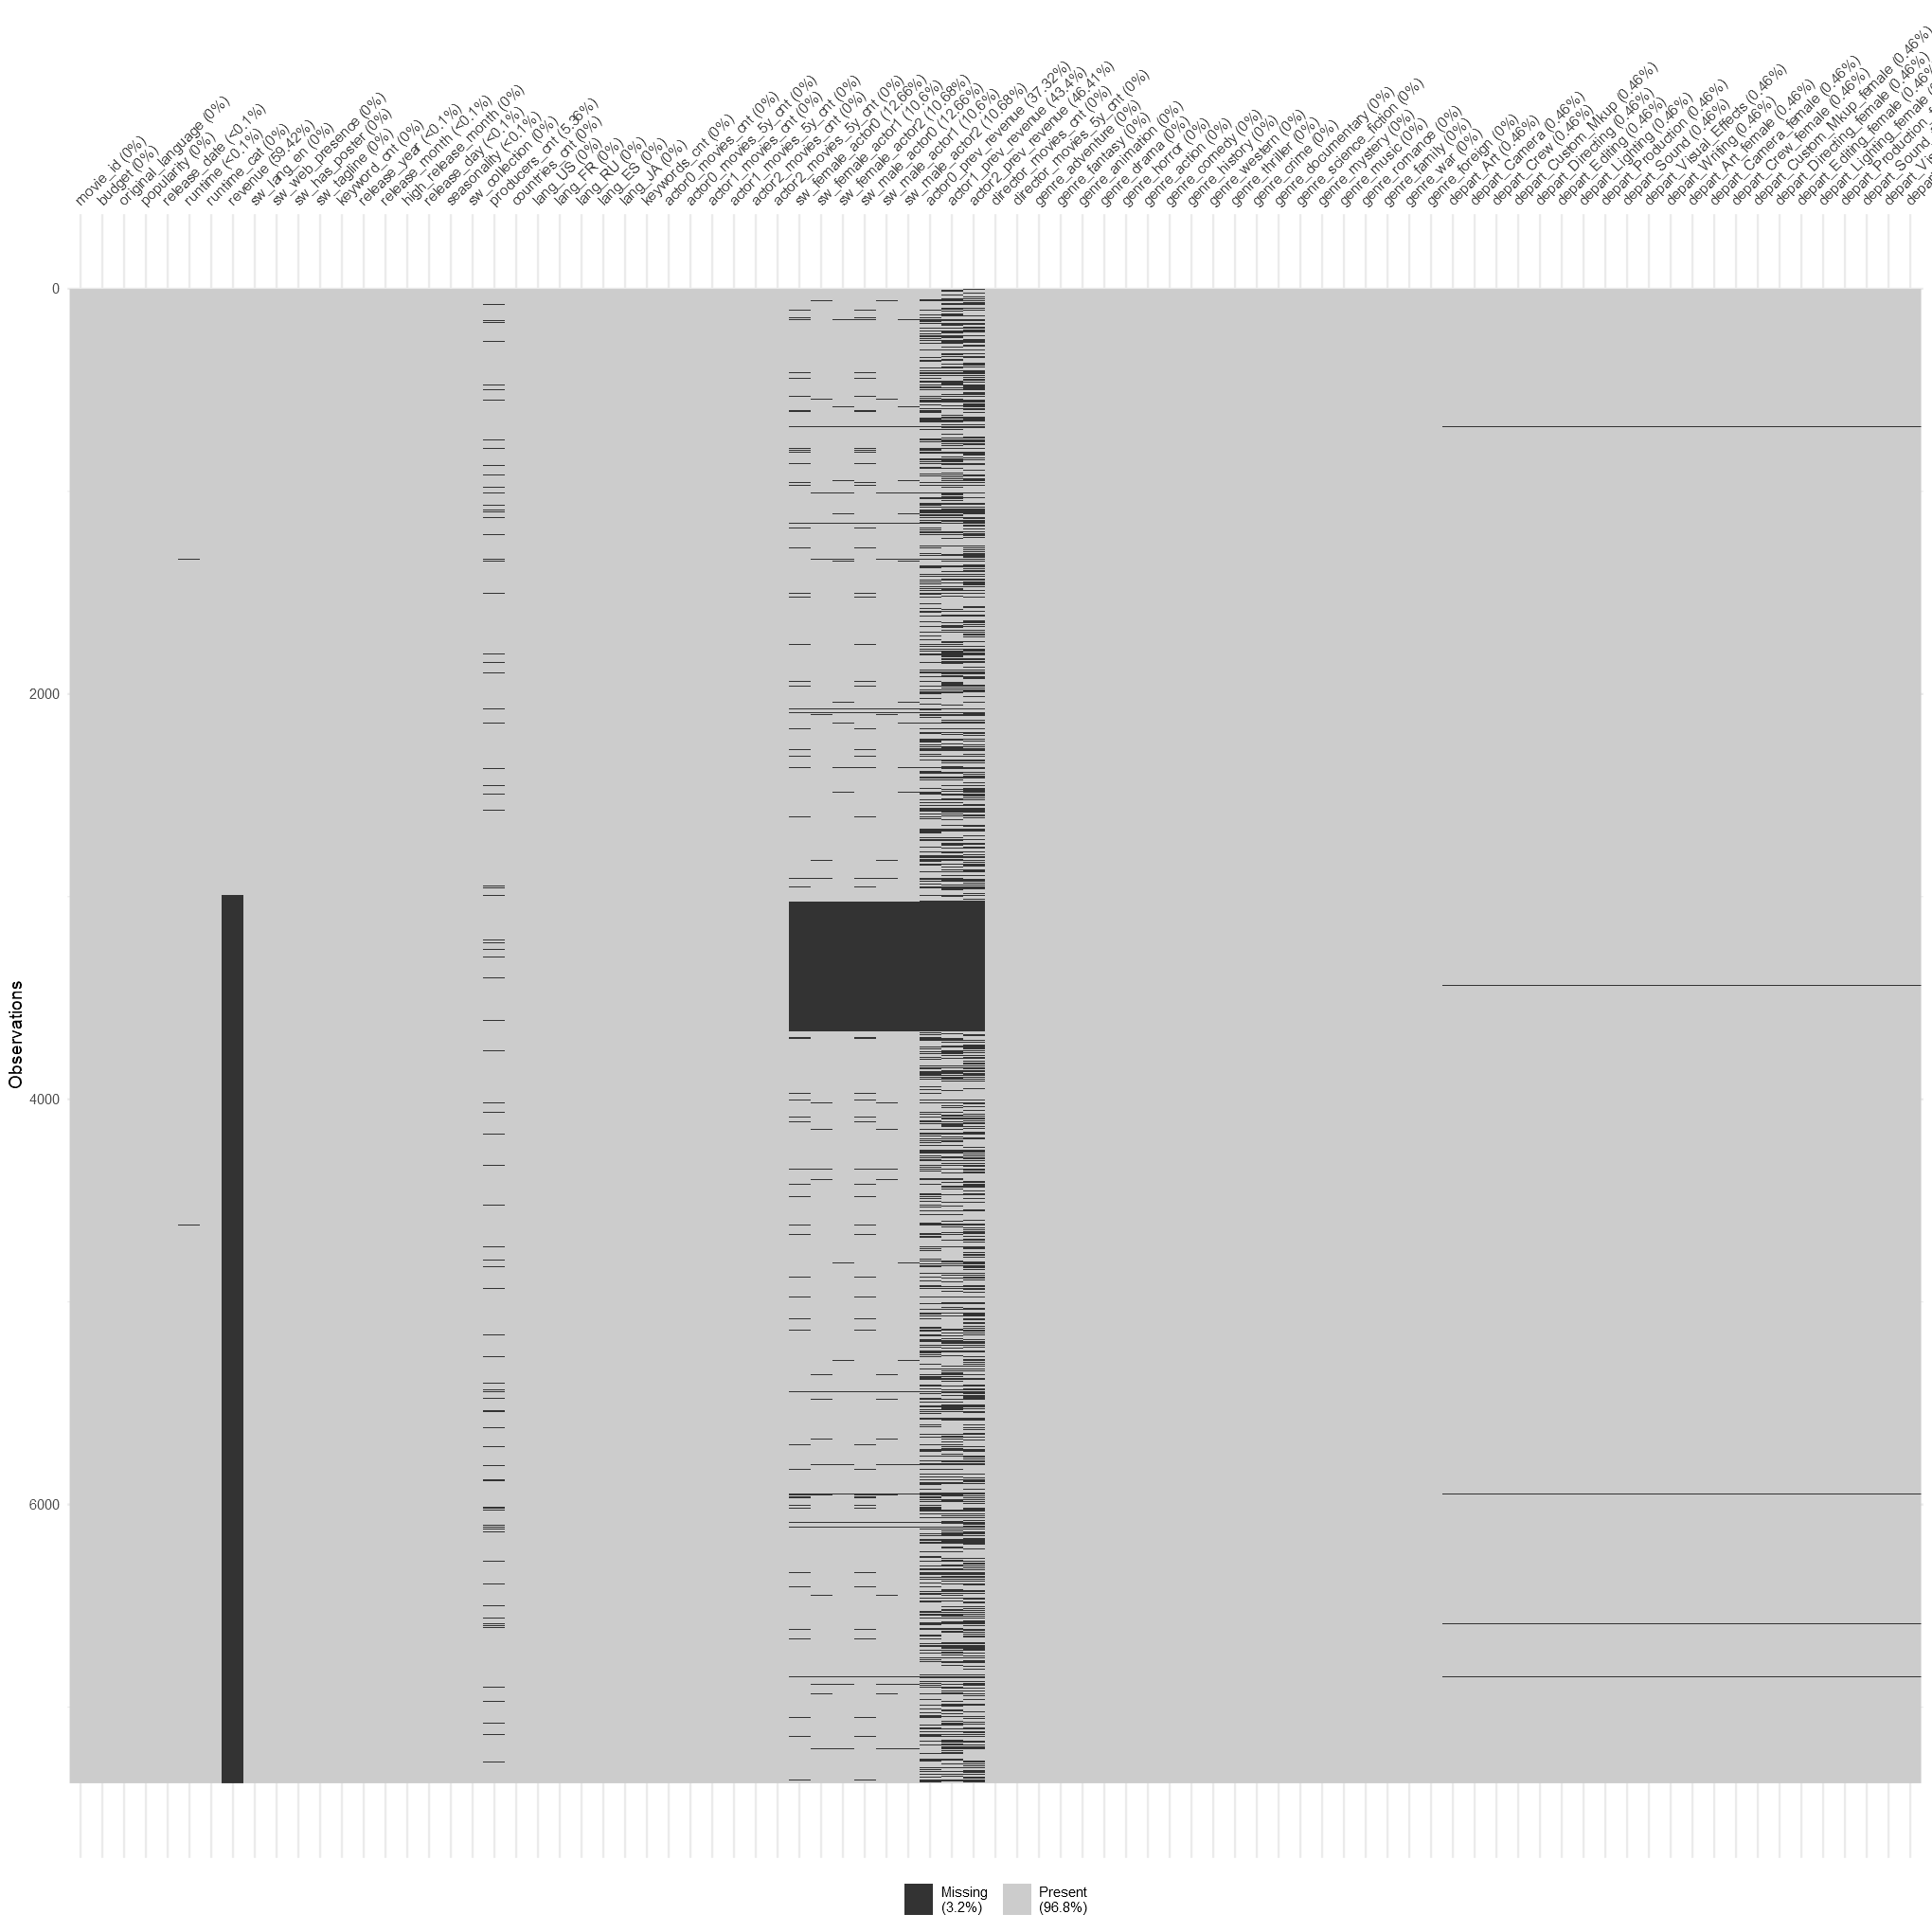

In [8]:
options(repr.plot.width = 17, repr.plot.height = 17) # the black boxes are missing values
vis_miss(movies_ff_v) # the vis_miss crate the heatmap

# Data cleaning

# 1.Finding outliers

In [51]:
getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }
  getOutlierGraph <- function(x) {
   
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    pl <- stats::scatter.smooth(df$x,col=df$cl)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)

    return(pl)
  }

In [52]:
outlierMatrix <- function(data,threshold=1.5) {  #for each column it calculate the min max median and IQR 
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <-median(data[[v]],na.rm=T)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) # calculating the Q1
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T) # calculating the Q3
            irq_level <- (outhigh - outlow) * threshold # calculating the IQR  Q3-Q1
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

# outlierMatrix 

In [113]:
#Runing outlierMatrix 
movies_outlier <- outlierMatrix(movies_ff_v,threshold=1.5)
#since the outlierMatrix delete the numbers in "muvie_id", I added a new column of numbers named "observation"
movies_outlier <- cbind(movies_outlier, "observation"=1:nrow(movies_outlier))
head(movies_outlier) 

movie_id budget popularity runtime revenue sw_lang_en sw_web_presence
1 0        0      0          0       0       0          0              
2 0        0      0          0       0       0          0              
3 0        0      1          0       0       0          0              
4 0        0      0          0       0       1          0              
5 0        0      0          0       0       1          0              
6 0        0      0          0       0       0          0              
  sw_has_poster sw_tagline keyword_cnt ... depart_Crew_female
1 0             0          0           ... 0                 
2 0             0          0           ... 0                 
3 0             0          0           ... 1                 
4 0             1          0           ... 0                 
5 0             1          0           ... 0                 
6 0             1          0           ... 0                 
  depart_Custom_Mkup_female depart_Directing_female depart_Editing_female
1 0                         0                       0                    
2 0                         0                       0                    
3 0                         0                       0                    
4 0                         0                       0                    
5 0                         0                       0                    
6 0                         0                       0                    
  depart_Lighting_female depart_Production_female depart_Sound_female
1 0                      0                        0                  
2 0                      0                        0                  
3 0                      0                        0                  
4 0                      0                        0                  
5 0                      0                        0                  
6 0                      0                        0                  
  depart_Visual_Effects_female depart_Writing_female observation
1 0                            0                     1          
2 0                            1                     2          
3 0                            0                     3          
4 0                            0                     4          
5 0                            0                     5          
6 0                            0                     6

In [114]:
#### since I added the "observation"column in the outlierMatrix (movies_outlier) I did the same with the movies_ff_v
movies_ff_v <- cbind(movies_ff_v, "observation"=1:nrow(movies_ff_v))
head(movies_ff_v)

movie_id budget   original_language popularity release_date runtime
1 1        14000000 en                 6.575393  2015-02-20    93    
2 2        40000000 en                 8.248895  2004-08-06   113    
3 3         3300000 en                64.299990  2014-10-10   105    
4 4         1200000 hi                 3.174936  2012-03-09   122    
5 5               0 ko                 1.148070  2009-02-05   118    
6 6         8000000 en                 0.743274  1987-08-06    83    
  runtime_cat revenue  sw_lang_en sw_web_presence ... depart_Crew_female
1 Short       12314651 1          0               ... 0                 
2 Medium      95149435 1          0               ... 0                 
3 Medium      13092000 1          1               ... 1                 
4 Large       16000000 0          1               ... 0                 
5 Medium       3923970 0          0               ... 0                 
6 Short        3261638 1          0               ... 0                 
  depart_Custom_Mkup_female depart_Directing_female depart_Editing_female
1 0                         0                       0                    
2 0                         0                       0                    
3 0                         0                       0                    
4 0                         0                       0                    
5 0                         0                       0                    
6 0                         0                       0                    
  depart_Lighting_female depart_Production_female depart_Sound_female
1 0                      0                        0                  
2 0                      3                        0                  
3 0                      2                        0                  
4 0                      0                        0                  
5 0                      0                        0                  
6 0                      0                        0                  
  depart_Visual_Effects_female depart_Writing_female observation
1 0                            0                     1          
2 0                            1                     2          
3 0                            0                     3          
4 0                            0                     4          
5 0                            0                     5          
6 0                            0                     6

In [118]:
movies_ff_v %>% 
mutate(get_out=(ifelse(movies_outlier$revenue==1,NULL,movies_ff_v$revenue)))

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


# Joining the outlierMatrix (movies_outlier) with  movies_ff_v by "observation"

In [117]:
movies_join_outlier <- (movies_ff_v %>%
                       left_join(movies_outlier, by="observation"))
head(movies_join_outlier)

movie_id.x budget.x original_language popularity.x release_date runtime.x
1 1          14000000 en                 6.575393    2015-02-20    93      
2 2          40000000 en                 8.248895    2004-08-06   113      
3 3           3300000 en                64.299990    2014-10-10   105      
4 4           1200000 hi                 3.174936    2012-03-09   122      
5 5                 0 ko                 1.148070    2009-02-05   118      
6 6           8000000 en                 0.743274    1987-08-06    83      
  runtime_cat revenue.x sw_lang_en.x sw_web_presence.x ...
1 Short       12314651  1            0                 ...
2 Medium      95149435  1            0                 ...
3 Medium      13092000  1            1                 ...
4 Large       16000000  0            1                 ...
5 Medium       3923970  0            0                 ...
6 Short        3261638  1            0                 ...
  depart_Camera_female.y depart_Crew_female.y depart_Custom_Mkup_female.y
1 0                      0                    0                          
2 0                      0                    0                          
3 0                      1                    0                          
4 0                      0                    0                          
5 0                      0                    0                          
6 0                      0                    0                          
  depart_Directing_female.y depart_Editing_female.y depart_Lighting_female.y
1 0                         0                       0                       
2 0                         0                       0                       
3 0                         0                       0                       
4 0                         0                       0                       
5 0                         0                       0                       
6 0                         0                       0                       
  depart_Production_female.y depart_Sound_female.y
1 0                          0                    
2 0                          0                    
3 0                          0                    
4 0                          0                    
5 0                          0                    
6 0                          0                    
  depart_Visual_Effects_female.y depart_Writing_female.y
1 0                              0                      
2 0                              1                      
3 0                              0                      
4 0                              0                      
5 0                              0                      
6 0                              0